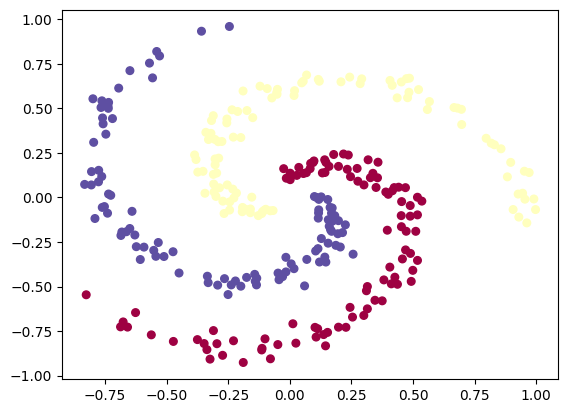

In [80]:
# source: CS231n Deep Learning for Computer Vision
import numpy as np
import matplotlib.pyplot as plt

N=100
D=2
K=3

X=np.zeros((N*K,D)) # data matrix
y=np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
    ix=range(N*j, N*(j+1))
    r=np.linspace(0.1,1,N) # radius
    t=np.linspace(j*4,(j+1)*4,N)+np.random.randn(N)*0.2 # theta
    X[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix]=j


plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Spectral)
plt.show()


In [62]:
# creating a dataframe
import pandas as pd
spiral=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":y})


In [63]:
spiral

,X1,X2,label
0,0.001082,0.099994,0
1,-0.028121,0.105404,0
2,-0.000943,0.118178,0
3,0.028926,0.123942,0
4,0.023647,0.134298,0
...,...,...,...
295,-0.844834,0.463519,2
296,-0.737464,0.634306,2
297,-0.301363,0.934424,2
298,-0.427381,0.894006,2


In [64]:
spiral.label.value_counts()

label
0    100
1    100
2    100
Name: count, dtype: int64

a new approach for training neural network

In [66]:
h = 100  # hidden layers
# X (300,2)
# y (300,)

# input layer -> hidden layer
w1 = 0.01*np.random.randn(D, h)  # (2,100)
b1 = np.zeros((1, h))  # (1,100)

# hidden layer -> output layer
w2 = 0.01*np.random.randn(h, K)  # (100,3)
b2 = np.zeros((1, K))  # (1,3)

# hyperparameters
lr = 1.0
reg = 0.001  # regularization parameter
epochs = 10000

# N
num_examples = X.shape[0]  # 300 

for epoch in range(epochs):

    # input to hidden layer
    # applying ReLu activation
    hidden_layer=np.maximum(0,np.dot(X,w1)+b1) # (300,100)
    # hidden to output layer
    scores = np.dot(hidden_layer, w2)+b2  # (300,3)

    # computing class probablities
    exp_scores = np.exp(scores)  # (300,3)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)  # (300,3)

    # loss : avg cross-entropy loss + regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])  # (300,)
    data_loss = np.sum(correct_logprobs)/num_examples
    regularization_loss = 0.5*reg*np.sum(w1*w1)+0.5*reg*np.sum(w2*w2)
    loss = data_loss+regularization_loss

    if epoch%1000==0:
        print(f"Epoch: {epoch}|Loss: {loss}")
    
    # computing the gradient of scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropagation
    # output layer to hidden layer
    dw2=np.dot(hidden_layer.T,dscores)
    db2=np.sum(dscores,axis=0, keepdims=True)
    dhidden=np.dot(dscores,w2.T)

    # backprop the ReLu non-linearity
    dhidden[hidden_layer<=0]=0

    # hidden layer to input layer
    dw1=np.dot(X.T, dhidden)
    db1=np.sum(dhidden, axis=0, keepdims=True)

    # adding regularization gradient contribution
    dw2+=reg*w2
    dw1+=reg*w1


    # parameter updation
    w1+=-lr*dw1
    b1+=-lr*db1

    w2+=-lr*dw2
    b2+=-lr*db2


Epoch: 0|Loss: 1.0986459671842692
Epoch: 1000|Loss: 0.2526941668648708
Epoch: 2000|Loss: 0.20183786601685944
Epoch: 3000|Loss: 0.1983966801483163
Epoch: 4000|Loss: 0.19667163405618482
Epoch: 5000|Loss: 0.19598768597014643
Epoch: 6000|Loss: 0.19561360587127066
Epoch: 7000|Loss: 0.19537633956853187
Epoch: 8000|Loss: 0.1952287608815948
Epoch: 9000|Loss: 0.19504924985654568


In [70]:
# evaluating training set accuray
hidden_layer=np.maximum(0,np.dot(X,w1)+b1)
scores=np.dot(hidden_layer,w2)+b2

predited_class=np.argmax(scores, axis=1)
print(f"Training Accuray: {np.mean(predited_class==y)*100}%")

Training Accuray: 100.0%


(-1.9263577612806104, 1.953642238719393)

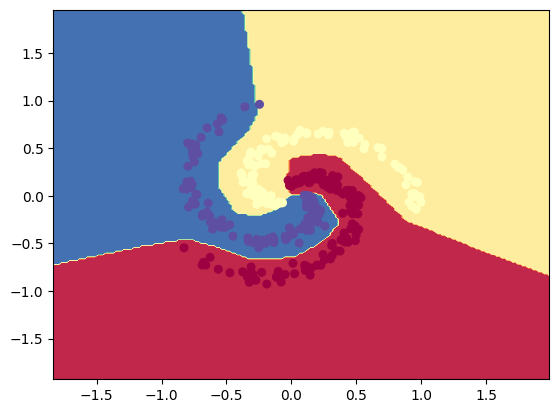

In [83]:
# plottig the resultant classifier
h=0.02
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z=np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()],w1)+b1),w2)+b2
Z=np.argmax(Z,axis=1)
Z=Z.reshape(xx.shape)

fig=plt.figure()
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
